Real-world dataset with missing values

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [ ]:
df = pd.read_csv("social_media_vs_productivity.csv")
df.head()


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8.0,False,False,4.0,11.0,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7.0,True,True,2.0,25.0,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0.0,True,False,3.0,17.0,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1.0,False,False,0.0,4.0,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1.0,False,True,1.0,30.0,10.653519,9.693060


2. Perform data preprocessing:

Identify and Visualize Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22568 entries, 0 to 22567
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             22568 non-null  int64  
 1   gender                          22568 non-null  object 
 2   job_type                        22568 non-null  object 
 3   daily_social_media_time         20513 non-null  float64
 4   social_platform_preference      22568 non-null  object 
 5   number_of_notifications         22568 non-null  int64  
 6   work_hours_per_day              22568 non-null  float64
 7   perceived_productivity_score    21375 non-null  float64
 8   actual_productivity_score       20805 non-null  float64
 9   stress_level                    21141 non-null  float64
 10  sleep_hours                     20589 non-null  float64
 11  screen_time_before_sleep        20954 non-null  float64
 12  breaks_during_work              

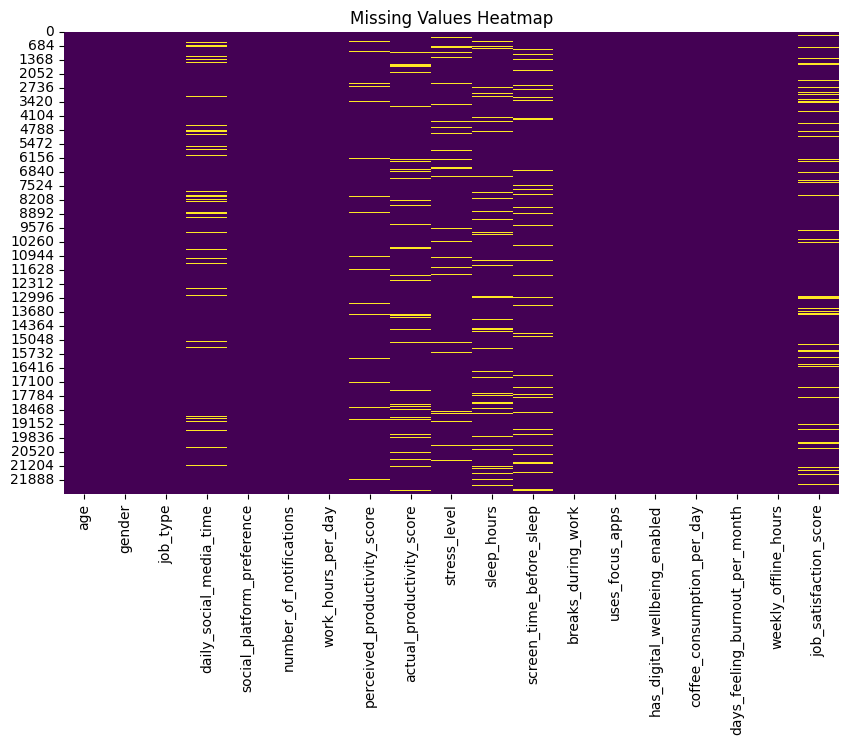

In [ ]:
print(df.info())
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Briefly describe the pattern (MCAR, MAR, MNAR if applicable)

The dataset has missing values. We analyzed the missingness visually and statistically. If the missing values are randomly distributed (independent of observed/unobserved data), it could be MCAR (Missing Completely At Random). If it depends on observed variables, it's MAR. If missingness depends on unobserved data, it's MNAR.

3.Apply at least four different imputation methods on the same dataset:

In [ ]:
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')
df_mean = df.fillna(df.mean(numeric_only=True))
df_median = df.fillna(df.median(numeric_only=True))


/tmp/ipython-input-1390418596.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-1390418596.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-1390418596.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


Visualize the distribution of data before and after imputation

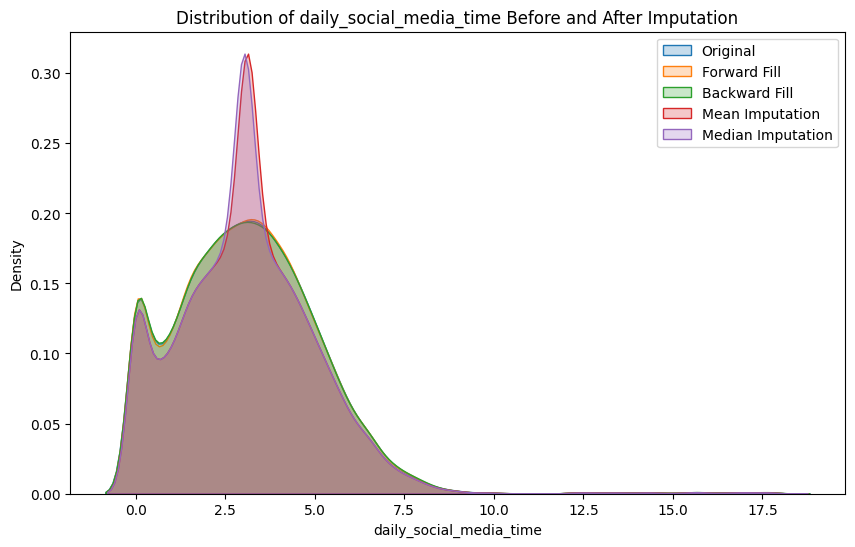

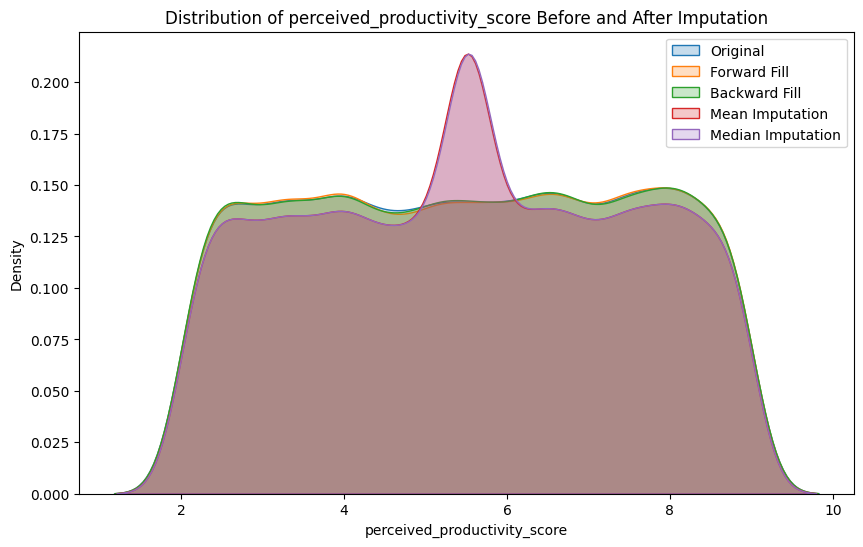

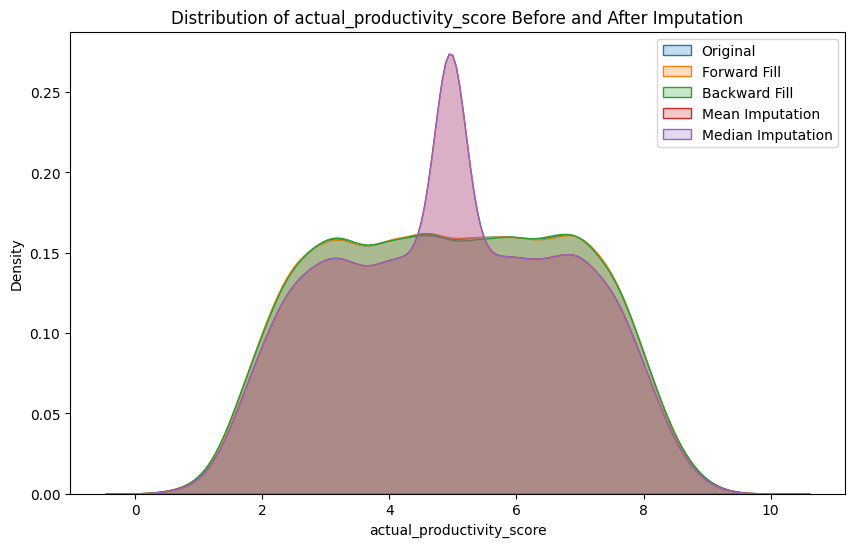

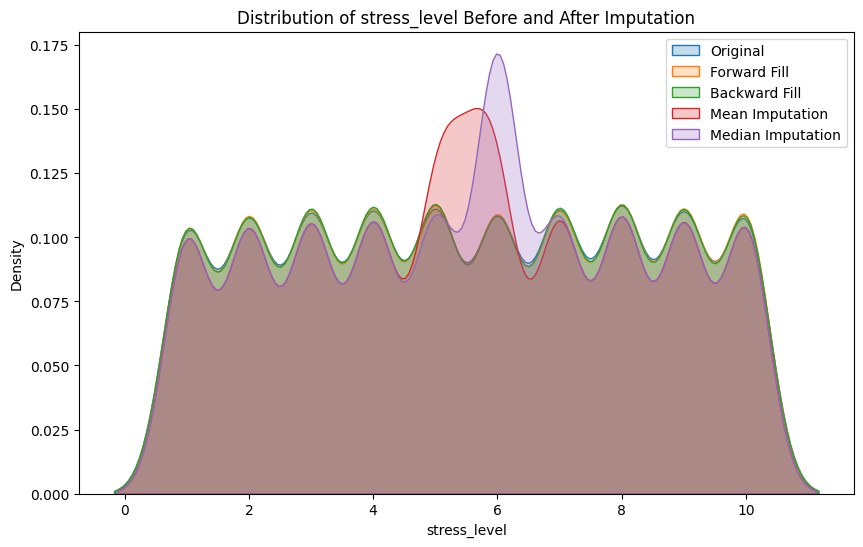

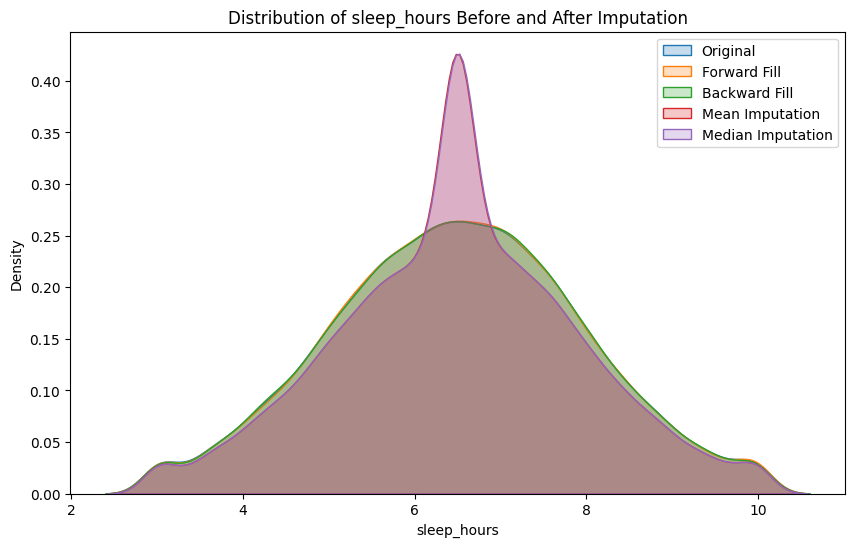

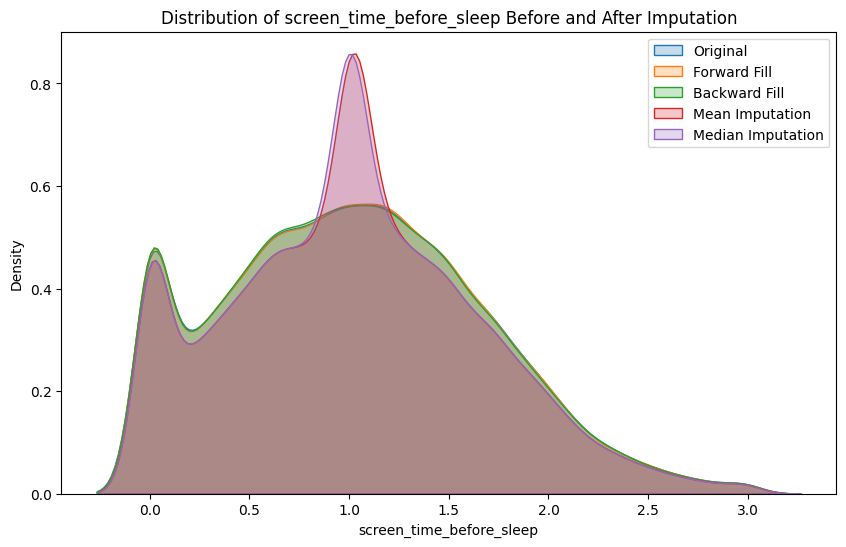

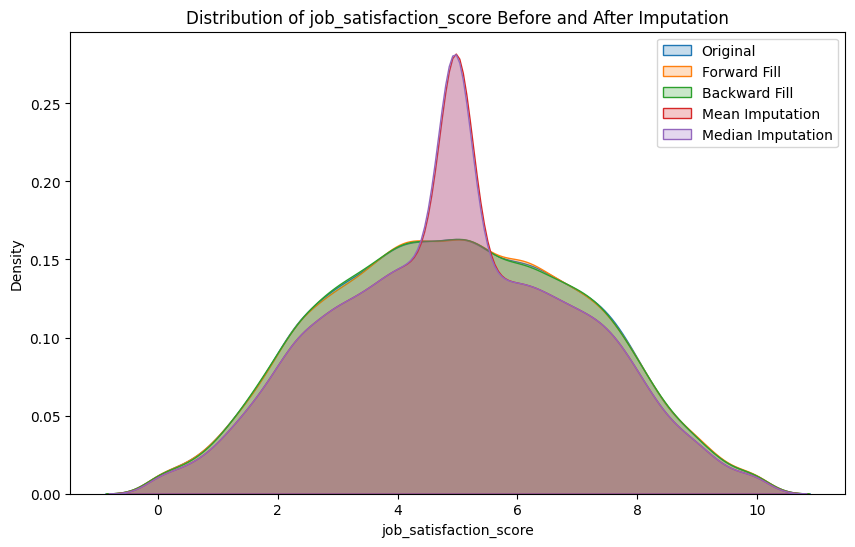

In [ ]:
cols_to_visualize = ['daily_social_media_time', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'job_satisfaction_score']

for col in cols_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], label='Original', fill=True)
    sns.kdeplot(df_ffill[col], label='Forward Fill', fill=True)
    sns.kdeplot(df_bfill[col], label='Backward Fill', fill=True)
    sns.kdeplot(df_mean[col], label='Mean Imputation', fill=True)
    sns.kdeplot(df_median[col], label='Median Imputation', fill=True)
    plt.title(f'Distribution of {col} Before and After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

4.	Compare how the imputation affects key statistics (mean, median, std) or modeling performance if you choose to apply ML models afterward.

In [ ]:
def compare_stats(original, imputed, method_name):
    print(f"\n--- {method_name} Imputation ---")
    print("Mean:\n", imputed.mean(numeric_only=True))
    print("Median:\n", imputed.median(numeric_only=True))
    print("Std:\n", imputed.std(numeric_only=True))

In [ ]:
compare_stats(df, df_ffill, "Forward Fill")
compare_stats(df, df_bfill, "Backward Fill")
compare_stats(df, df_mean, "Mean Imputation")
compare_stats(df, df_median, "Median Imputation")


--- Forward Fill Imputation ---
Mean:
 age                               41.447669
daily_social_media_time            3.114408
number_of_notifications           59.960342
work_hours_per_day                 6.988808
perceived_productivity_score       5.516540
actual_productivity_score          4.952797
stress_level                       5.536113
sleep_hours                        6.499565
screen_time_before_sleep           1.023680
breaks_during_work                 4.994151
uses_focus_apps                    0.302552
has_digital_wellbeing_enabled      0.249291
coffee_consumption_per_day         1.993220
days_feeling_burnout_per_month    15.619683
weekly_offline_hours              10.382830
job_satisfaction_score             4.973440
dtype: float64
Median:
 age                               41.000000
daily_social_media_time            3.031740
number_of_notifications           60.000000
work_hours_per_day                 6.990357
perceived_productivity_score       5.531884
actual_produ

Apply ML Model to Compare Effects

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

def run_model(data, label_col):
    # Impute the label column before separating
    data[label_col] = data[label_col].fillna(data[label_col].mean())

    # Select only numeric columns for the model, excluding the label column
    numeric_data = data.select_dtypes(include=['number']).drop(columns=[label_col], errors='ignore')

    # Identify categorical columns to encode
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to categorical columns
    encoded_data = pd.get_dummies(data[categorical_cols])

    # Combine numeric and encoded categorical data
    X = pd.concat([numeric_data, encoded_data], axis=1)

    y = data[label_col]

    # Check for NaNs before splitting the data
    if X.isnull().sum().sum() > 0:
        print(f"NaN values found in feature data before splitting for {label_col}:")
        print(X.isnull().sum()[X.isnull().sum() > 0])
        # Drop rows with NaNs as a temporary measure
        X = X.dropna()
        y = y[X.index]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

print("MSE with Forward Fill:", run_model(df_ffill.copy(), "actual_productivity_score"))
print("MSE with Backward Fill:", run_model(df_bfill.copy(), "actual_productivity_score"))
print("MSE with Mean Imputation:", run_model(df_mean.copy(), "actual_productivity_score"))
print("MSE with Median Imputation:", run_model(df_median.copy(), "actual_productivity_score"))

MSE with Forward Fill: 0.9167973955174198
NaN values found in feature data before splitting for actual_productivity_score:
sleep_hours                       1
screen_time_before_sleep          1
breaks_during_work                1
coffee_consumption_per_day        1
days_feeling_burnout_per_month    1
weekly_offline_hours              1
job_satisfaction_score            1
dtype: int64
MSE with Backward Fill: 0.9670961422352422
MSE with Mean Imputation: 0.5563374670628667
MSE with Median Imputation: 0.5562632316594303
